# Importing necessary libraries

In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Load dataset

In [63]:

df = pd.read_csv("booking.csv")

# Display basic info

In [66]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# Handling missing values

In [69]:

df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical columns with median
df.fillna(df.mode().iloc[0], inplace=True)

# Convert date column to datetime

In [72]:

df["date of reservation"] = pd.to_datetime(df["date of reservation"], dayfirst=True, errors='coerce')


# Encode categorical features

In [75]:

label_encoders = {}
categorical_cols = ["type of meal", "room type", "market segment type", "booking status"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define target variable and features

In [78]:

X = df.drop(columns=["Booking_ID", "booking status", "date of reservation"])
y = df["booking status"]

# Train-test split

In [81]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Booking Status Distribution

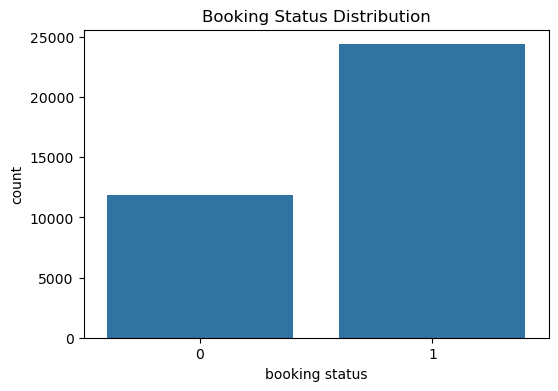

In [84]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["booking status"])
plt.title("Booking Status Distribution")
plt.show()

# Lead Time Distribution b Bookin Status

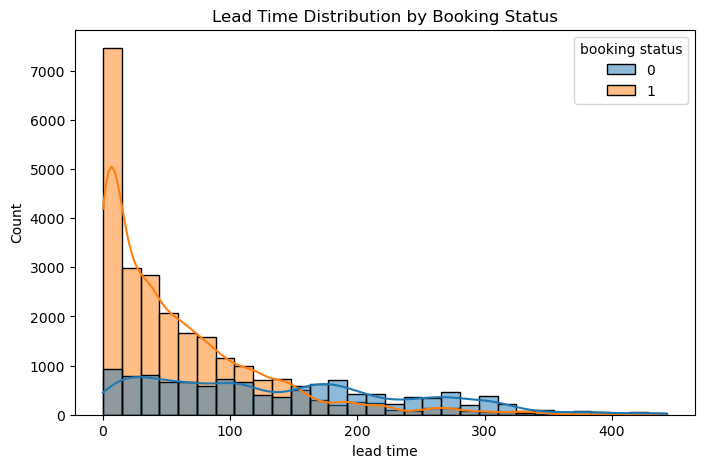

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="lead time", hue="booking status", kde=True, bins=30)
plt.title("Lead Time Distribution by Booking Status")
plt.show()

# Special Requests and Booking Status

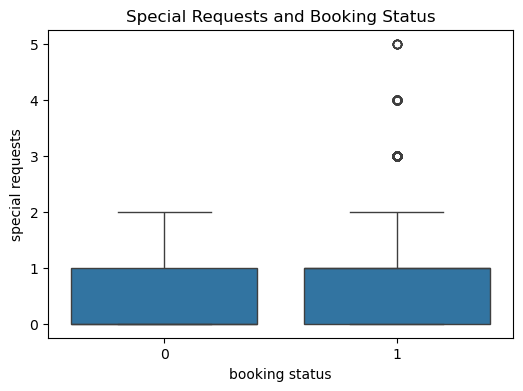

In [90]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="booking status", y="special requests", data=df)
plt.title("Special Requests and Booking Status")
plt.show()

# Average Price and Booking Status

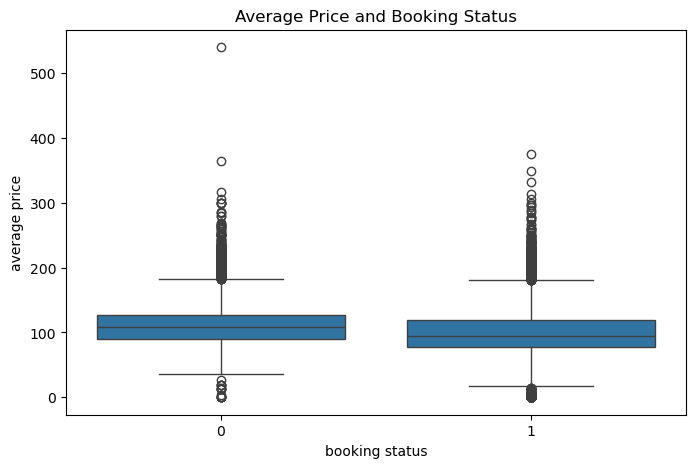

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="booking status", y="average price", data=df)
plt.title("Average Price and Booking Status")
plt.show()

# Market Segment Type and Booking Status

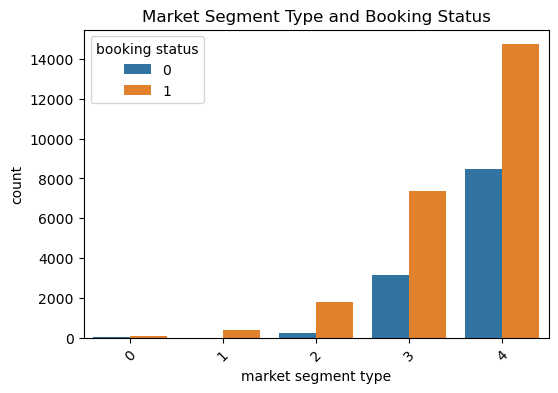

In [96]:
plt.figure(figsize=(6, 4))
sns.countplot(x="market segment type", hue="booking status", data=df)
plt.title("Market Segment Type and Booking Status")
plt.xticks(rotation=45)
plt.show()

# Room Type and Booking Status

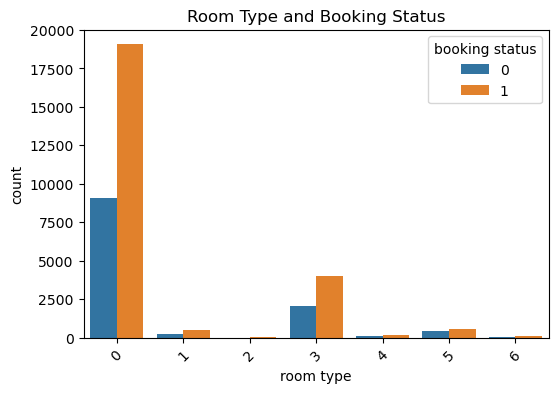

In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(x="room type", hue="booking status", data=df)
plt.title("Room Type and Booking Status")
plt.xticks(rotation=45)
plt.show()

# Train Decision Tree Model

In [102]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Decision Tree Performance

In [105]:

print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2402
           1       0.90      0.88      0.89      4855

    accuracy                           0.86      7257
   macro avg       0.84      0.84      0.84      7257
weighted avg       0.86      0.86      0.86      7257

Confusion Matrix:
 [[1910  492]
 [ 559 4296]]


# Train Random Forest Model

In [108]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Performance

In [110]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2402
           1       0.90      0.94      0.92      4855

    accuracy                           0.89      7257
   macro avg       0.88      0.86      0.87      7257
weighted avg       0.89      0.89      0.89      7257

Confusion Matrix:
 [[1894  508]
 [ 300 4555]]


In [111]:
# Feature Importance in Random Forest Model

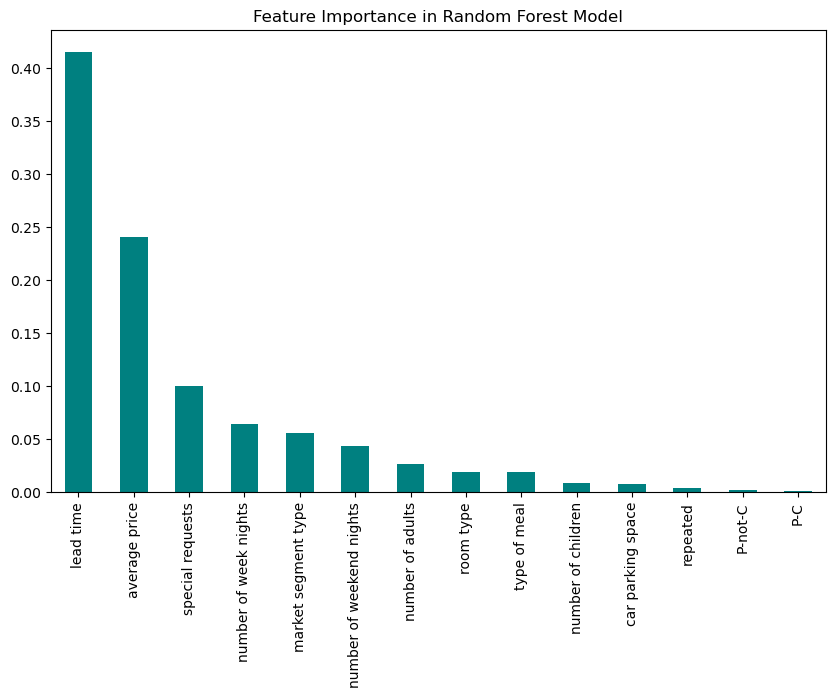

In [115]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [ ]:
#GitHubRepo
https://github.com/Lucky122002/Machine_Learning.git